In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})
plt.style.use('ggplot')

In [2]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stop_words = set(stopwords.words('english'))
stemer = PorterStemmer()

In [4]:
COLUMNS = ['news', 'Assassination','Hijacking','Kidnapping','Barricade Incident','Bombing/Explosion','Armed Assault','Unarmed Assault','Facility/Infrastructure Attack','Unknown']
input_path = '/Users/shahreenshahjahanpsyche/Desktop/SATP-Event-Classification/Data_MachineLearning/action_type_data.csv'
df = pd.read_csv(input_path, header=[0])
df.head(10)


,news,Assassination,Hijacking,Kidnapping,Barricade Incident,Bombing/Explosion,Armed Assault,Unarmed Assault,Facility/Infrastructure Attack,Unknown
0,Two Lashkar e Jhangvi LeJ militants Asim alias...,False,False,False,False,False,True,False,False,False
1,The Commander Southern Command Lieutenant Gene...,False,False,False,False,False,False,False,False,True
2,Meanwhile the underground organization Manipur...,False,False,False,False,True,False,False,False,False
3,Islamic State IS in the latest issue of its on...,False,False,False,False,False,True,False,False,False
4,A senior Muttahida Qaumi Movement MQM worker i...,True,False,False,False,False,False,False,False,False
5,The ongoing construction work of an interstate...,False,False,False,False,False,False,False,True,False
6,Two civilians were injured when unidentified a...,False,False,False,False,False,True,False,False,False
7,More than a week after a woman Communist Party...,False,False,False,False,False,True,False,False,False
8,Three boys sustained injuries when a landmine ...,False,False,False,False,True,False,False,False,False
9,Unidentified militants shot dead a Frontier Co...,True,False,False,False,False,False,False,False,False


In [5]:
df.shape

(1170, 10)

In [6]:
def remove_SW_Stem(text):
    text=[stemer.stem(words) for words in text.split(" ") if words not in stop_words]
    return " ".join(text)

special_chars = re.compile('[^0-9a-z#+_]')
add_space = re.compile('[/(){}\[\]\\@;]')
                             
def clean_text(text):
    text=text.lower()
    text = add_space.sub(" ",text)
    text = special_chars.sub(" ",text)
    text = remove_SW_Stem(text)
    return text

def plot_coefficients(classifier, feature_names, top_features=20):
    print(classifier.coef_)
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

df['news'] = df['news'].apply(lambda text:clean_text(text))

In [7]:
"""

    Preprocess - tf-idf
    Models - Naive Bayes, SVM
    Performance Matrix - Recall, Precision, F1-Score, Accuracy


"""



def model(df_action, action_type):
    
    counter = Counter(df_action[action_type].tolist())
    top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
    df_action = df_action[df_action[action_type].map(lambda x: x in top_10_varieties)]
    
    description_list = df_action['news'].tolist()
    varietal_list = [top_10_varieties[i] for i in df_action[action_type].tolist()]
    varietal_list = np.array(varietal_list)
    count_vect = CountVectorizer()
    x_train_counts = count_vect.fit_transform(description_list)
    tfidf_transformer = TfidfTransformer()
    x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
    train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)
    
    clf = MultinomialNB().fit(train_x, train_y)
    print("Naive bayes")
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))
    
    print("SVM")
    clf = SVC(kernel='linear').fit(train_x, train_y)
    y_score = clf.predict(test_x)
    print(classification_report(test_y, y_score))
    
#     plot_coefficients(clf, count_vect.get_feature_names())
    



# Assassination

False    1112
True       58
Name: Assassination, dtype: int64


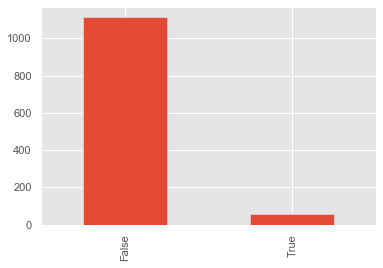

In [8]:
fig, ax = plt.subplots()
print(df['Assassination'].value_counts())
df['Assassination'].value_counts().plot(ax=ax, kind='bar')


In [183]:
model(df, 'Assassination')

Naive bayes
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       329
           1       0.00      0.00      0.00        22

    accuracy                           0.94       351
   macro avg       0.47      0.50      0.48       351
weighted avg       0.88      0.94      0.91       351

SVM
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       329
           1       1.00      0.05      0.09        22

    accuracy                           0.94       351
   macro avg       0.97      0.52      0.53       351
weighted avg       0.94      0.94      0.91       351



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Hijacking

False    1163
True        7
Name: Hijacking, dtype: int64


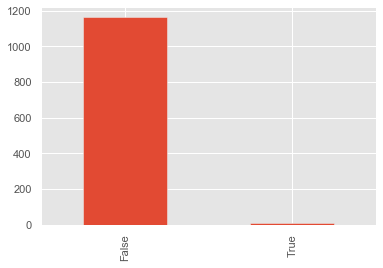

In [9]:
fig, ax = plt.subplots()
print(df['Hijacking'].value_counts())
df['Hijacking'].value_counts().plot(ax=ax, kind='bar')

In [185]:
model(df, 'Hijacking')

Naive bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.00      0.00      0.00         1

    accuracy                           1.00       351
   macro avg       0.50      0.50      0.50       351
weighted avg       0.99      1.00      1.00       351

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.00      0.00      0.00         1

    accuracy                           1.00       351
   macro avg       0.50      0.50      0.50       351
weighted avg       0.99      1.00      1.00       351



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Kidnapping

False    1069
True      101
Name: Kidnapping, dtype: int64


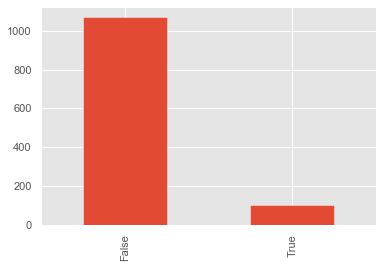

In [10]:
fig, ax = plt.subplots()
print(df['Kidnapping'].value_counts())
df['Kidnapping'].value_counts().plot(ax=ax, kind='bar')

In [187]:
model(df, 'Kidnapping')

Naive bayes
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       317
           1       0.00      0.00      0.00        34

    accuracy                           0.90       351
   macro avg       0.45      0.50      0.47       351
weighted avg       0.82      0.90      0.86       351

SVM
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       317
           1       0.86      0.53      0.65        34

    accuracy                           0.95       351
   macro avg       0.90      0.76      0.81       351
weighted avg       0.94      0.95      0.94       351



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Barricade Incident

False    1169
True        1
Name: Barricade Incident, dtype: int64


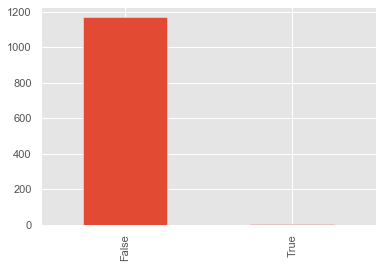

In [11]:
fig, ax = plt.subplots()
print(df['Barricade Incident'].value_counts())
df['Barricade Incident'].value_counts().plot(ax=ax, kind='bar')

In [189]:
model(df, 'Barricade Incident')

Naive bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351

    accuracy                           1.00       351
   macro avg       1.00      1.00      1.00       351
weighted avg       1.00      1.00      1.00       351



# Bombing/Explosion

False    771
True     399
Name: Bombing/Explosion, dtype: int64


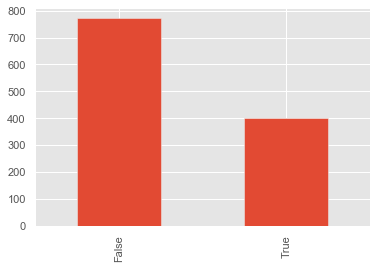

In [12]:
fig, ax = plt.subplots()
print(df['Bombing/Explosion'].value_counts())
df['Bombing/Explosion'].value_counts().plot(ax=ax, kind='bar')

In [191]:
model(df, 'Bombing/Explosion')

Naive bayes
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       227
           1       1.00      0.35      0.52       124

    accuracy                           0.77       351
   macro avg       0.87      0.68      0.69       351
weighted avg       0.83      0.77      0.73       351

SVM
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       227
           1       0.97      0.81      0.89       124

    accuracy                           0.93       351
   macro avg       0.94      0.90      0.92       351
weighted avg       0.93      0.93      0.92       351



# Armed Assault

False    675
True     495
Name: Armed Assault, dtype: int64


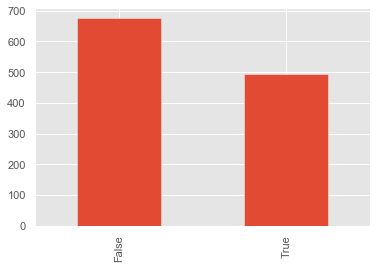

In [13]:
fig, ax = plt.subplots()
print(df['Armed Assault'].value_counts())
df['Armed Assault'].value_counts().plot(ax=ax, kind='bar')

In [193]:
model(df, 'Armed Assault')

Naive bayes
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       193
           1       0.89      0.46      0.60       158

    accuracy                           0.73       351
   macro avg       0.79      0.70      0.70       351
weighted avg       0.77      0.73      0.71       351

SVM
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       193
           1       0.85      0.75      0.80       158

    accuracy                           0.83       351
   macro avg       0.83      0.82      0.83       351
weighted avg       0.83      0.83      0.83       351



# Unarmed Assault

False    1121
True       49
Name: Unarmed Assault, dtype: int64


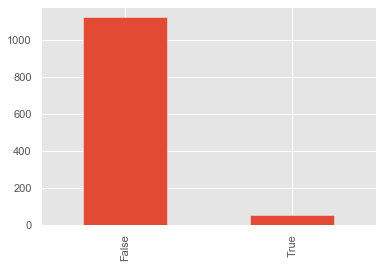

In [14]:
fig, ax = plt.subplots()
print(df['Unarmed Assault'].value_counts())
df['Unarmed Assault'].value_counts().plot(ax=ax, kind='bar')

In [195]:
model(df, 'Unarmed Assault')

Naive bayes
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       335
           1       0.00      0.00      0.00        16

    accuracy                           0.95       351
   macro avg       0.48      0.50      0.49       351
weighted avg       0.91      0.95      0.93       351

SVM
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       335
           1       0.00      0.00      0.00        16

    accuracy                           0.95       351
   macro avg       0.48      0.50      0.49       351
weighted avg       0.91      0.95      0.93       351



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Facility/Infrastructure Attack

False    1059
True      111
Name: Facility/Infrastructure Attack, dtype: int64


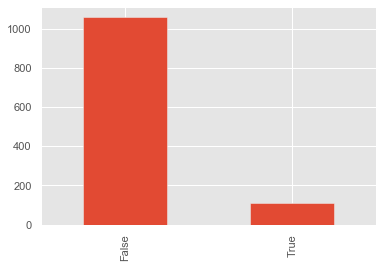

In [15]:
fig, ax = plt.subplots()
print(df['Facility/Infrastructure Attack'].value_counts())
df['Facility/Infrastructure Attack'].value_counts().plot(ax=ax, kind='bar')

In [197]:
model(df, 'Facility/Infrastructure Attack')

Naive bayes
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       329
           1       0.00      0.00      0.00        22

    accuracy                           0.94       351
   macro avg       0.47      0.50      0.48       351
weighted avg       0.88      0.94      0.91       351

SVM
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       329
           1       0.79      0.50      0.61        22

    accuracy                           0.96       351
   macro avg       0.88      0.75      0.80       351
weighted avg       0.96      0.96      0.96       351



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Unknown

False    1045
True      125
Name: Unknown, dtype: int64


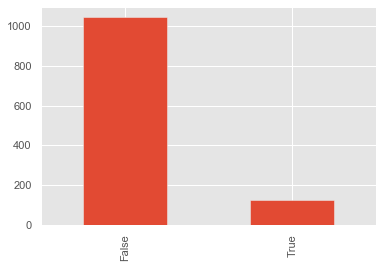

In [16]:
fig, ax = plt.subplots()
print(df['Unknown'].value_counts())
df['Unknown'].value_counts().plot(ax=ax, kind='bar')

In [199]:
model(df, 'Unknown')

Naive bayes
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       317
           1       0.00      0.00      0.00        34

    accuracy                           0.90       351
   macro avg       0.45      0.50      0.47       351
weighted avg       0.82      0.90      0.86       351

SVM
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       317
           1       1.00      0.03      0.06        34

    accuracy                           0.91       351
   macro avg       0.95      0.51      0.50       351
weighted avg       0.91      0.91      0.86       351



/Users/shahreenshahjahanpsyche/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
